## Exercício de Tensorflow e Keras

O cojunto de dados que será trabalhado neste exerício chama-se landing club. Lending Club é o maior centro de empréstimos de pessoa para pessoa que existe, os dados são de cada uma das pessoas que fizeram um empréstimo e tentar fazer um programa que possa entender através da diversidade apresentada no conjunto se a pessoa pagará ou não o empréstimo feito. E caso outra pessoa faça um empréstimo na mesma plataforma, se ela tem mais chances de pagar ou não.

### Importações de bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

### Carregando os dados

In [3]:
caminho = '/Users/user/Documents/Pessoal/TensorFlow_FILES/DATA/lending_club_loan_two.csv'
df = pd.read_csv(caminho)

### Descrição dos dados

Lembrando, pela descrição dos dados, que a coluna TARGET é a loan_status

In [10]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [13]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


### Análise exploratória

Text(0, 0.5, 'Contagem')

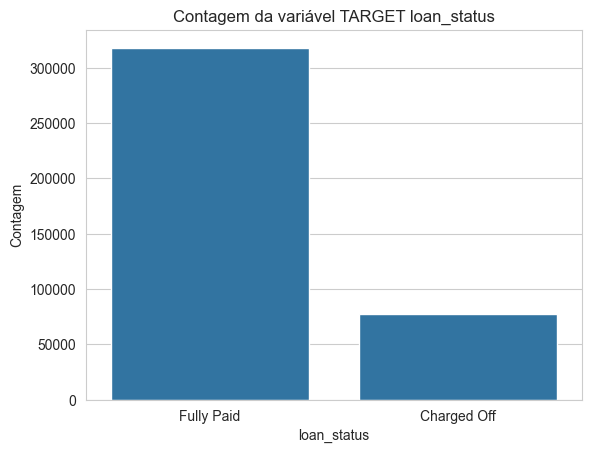

In [16]:
sns.countplot(df, x='loan_status')
plt.title("Contagem da variável TARGET loan_status")
plt.ylabel("Contagem")

Classe claramente desbalanceada, já poderia ser observado na descrição estatística das variáveis categóricas

<Axes: xlabel='loan_amnt', ylabel='Count'>

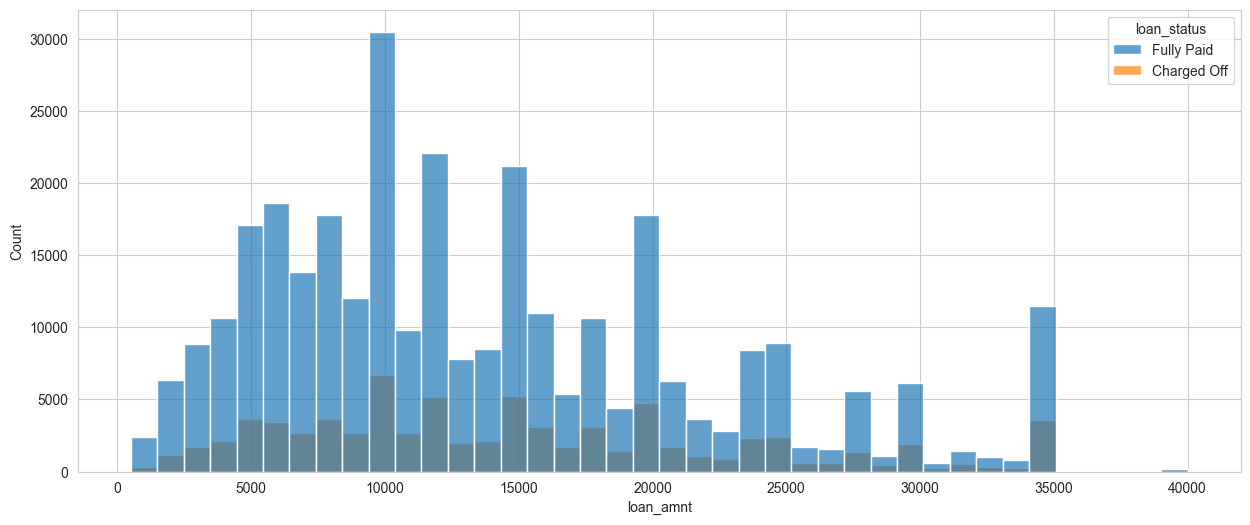

In [46]:
plt.figure(figsize=(15,6))
sns.histplot(df, x='loan_amnt', bins=40, hue='loan_status', alpha=0.7)


Distribuição da variável loan_amnt não é normal, possui uma cauda direita bastante pesada

In [27]:
df_corr = df.select_dtypes(exclude='object').corr()

<Axes: >

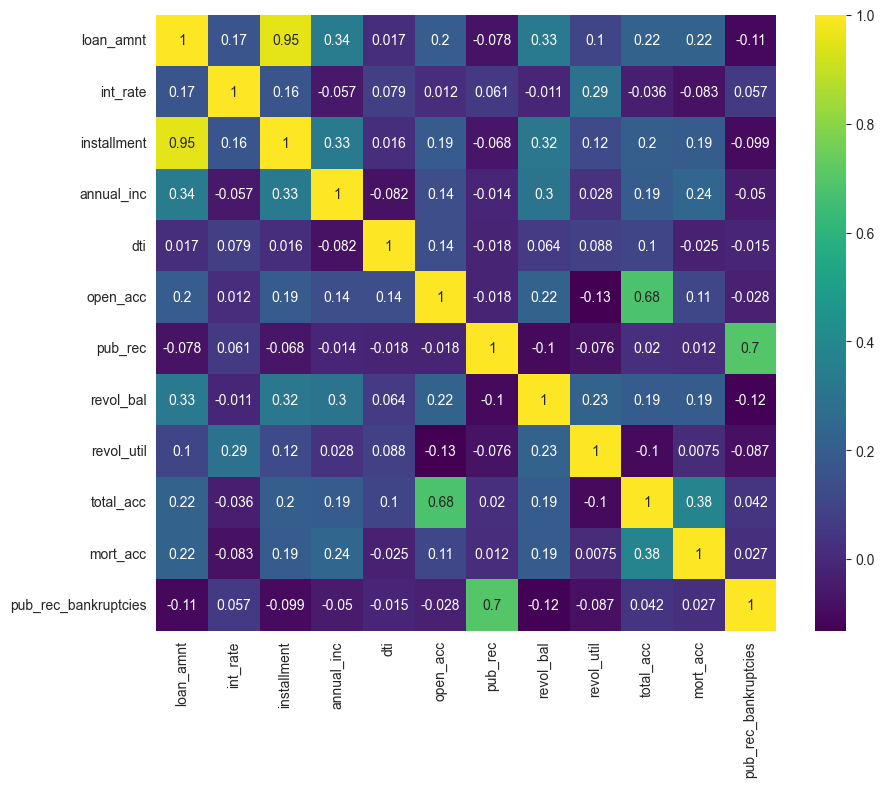

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot=True, cmap='viridis')

O máximo de correlação observada entre as variáveis é de 0.95 entre annual_inc e loan_amnt, seguido por 0.7 por pub_rec_bankrupcies com pub_rec e 0.68 por open_acc e total_acc, o resto são correlações de pouca significância. Além disso não há relações invertidas, ou seja, poucos valores negativos e próximos a -1.

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


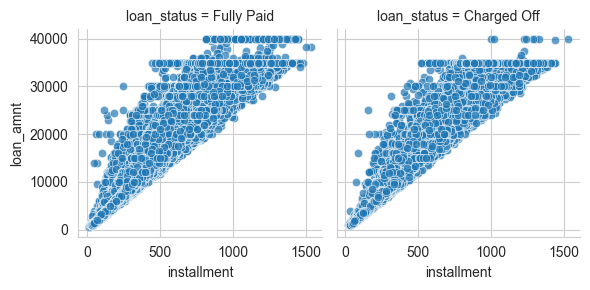

In [45]:
p = sns.FacetGrid(df, col='loan_status',)
p.map_dataframe(sns.scatterplot, x='installment', y='loan_amnt', alpha=0.7)

Essa relação entre as duas variáveis é clara. o que se pode tirar do gráfico anterior é que há uma grande variação de número de parcelas que as pessoas podem pagar o valor adquirido com o empréstimo. Por exemplo, 35k podem ser dividios em parcelas que variam de 400 até 1400.

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

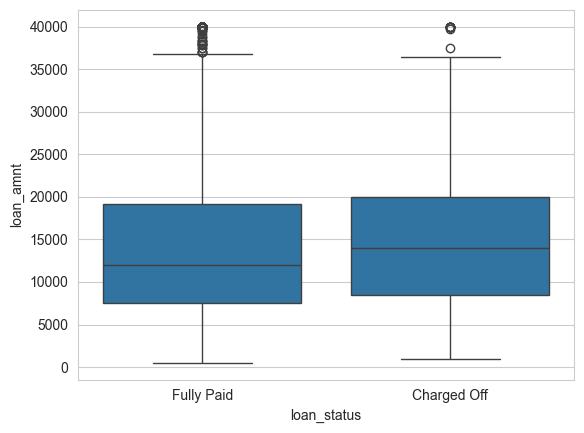

In [41]:
sns.boxplot(df, x='loan_status', y='loan_amnt')

In [40]:
df.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0
